## Customer segmentation using hierarchical clustering and kmeans clustering

  The aim of this clustering is to develop a customer segmentation to define marketing strategy for credit card users. The dataset used contain variable that explains the behaviours of about 9000 credit card users in the last 6 months. In respect to the main aim of the clustering most suitable features that will form very distinct clusters are those that clearly explaing credit card's user purchase activites(ONEOFF_PURCHASES, PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY)
   The hierarchical clustering and K-Means clustering algorithm will used to created clusters and both result will be compared in other to decide on which algorithm best segments the credit card users

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv('CC GENERAL.csv')
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
#Data Exploration

In [5]:
data.shape

(8950, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [80]:
#Filling null values using interpolate method
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].interpolate(method='linear')

In [81]:
#Creating a list of all numerical variable
num_var = list(data.select_dtypes(include=['float64','int64']).columns)

#copying the dataframe to  a new variable
data_duplicate = data.copy()

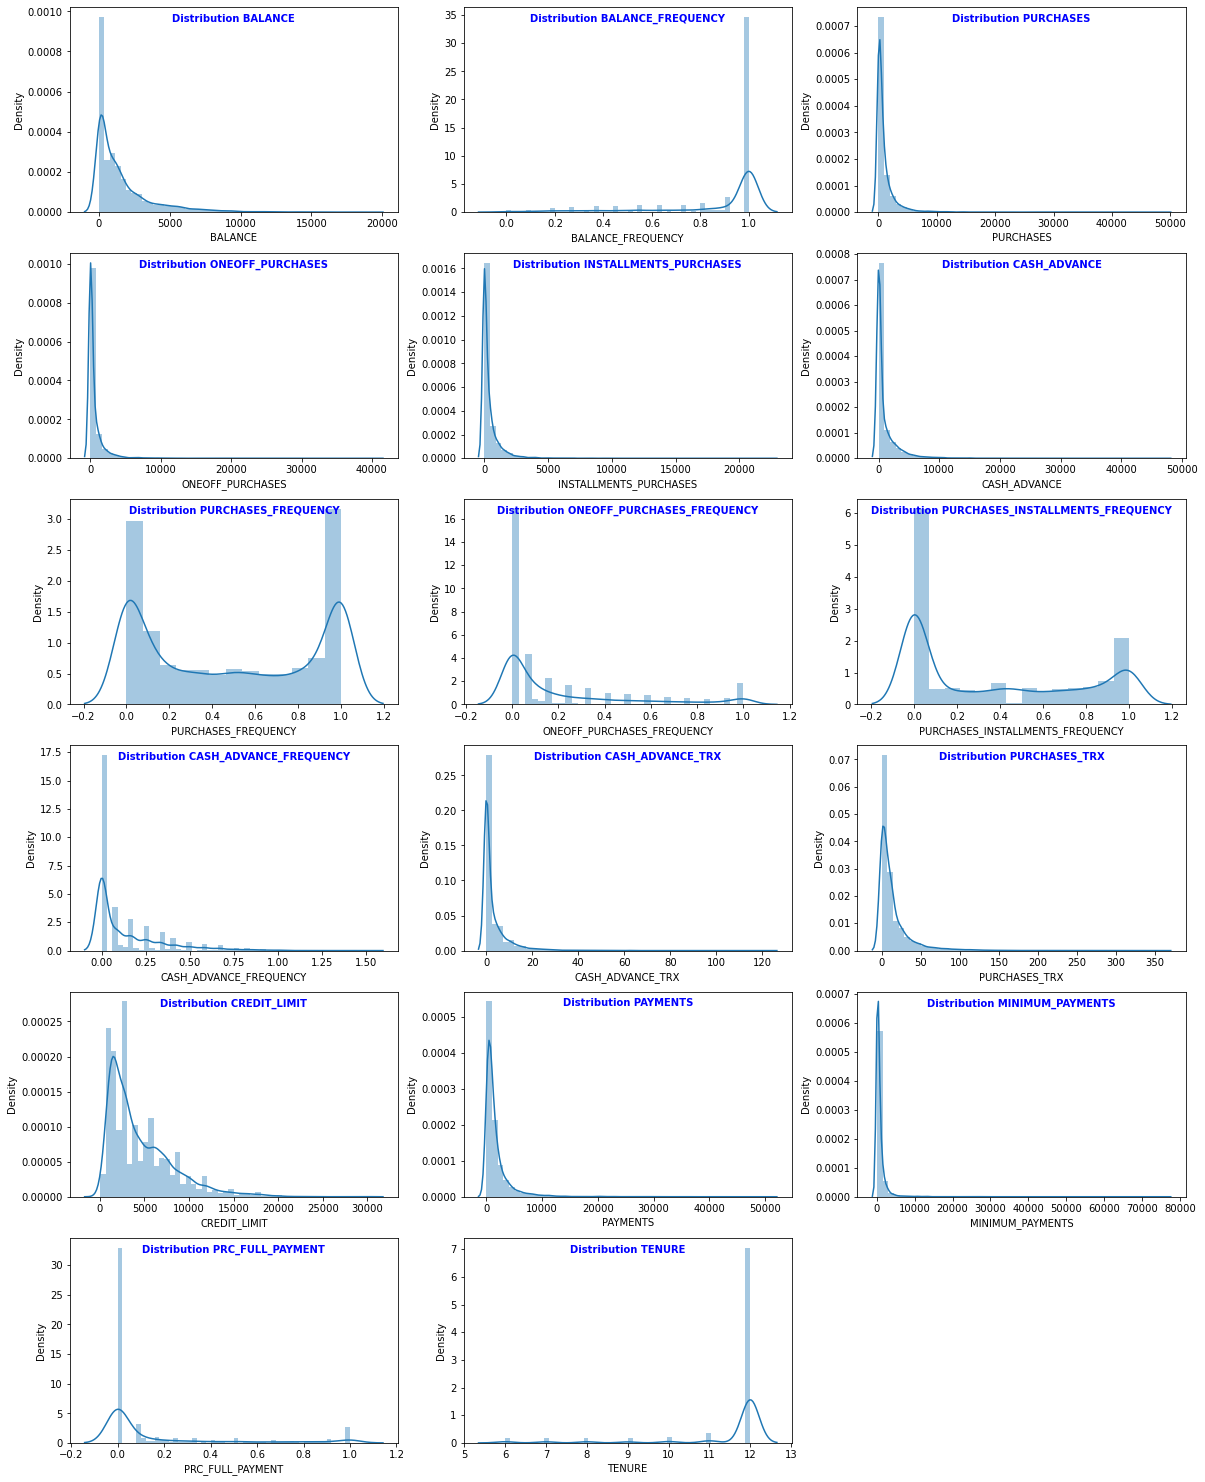

In [82]:
#Visualization of the disturbution of the numerical variales in each column
plt.figure(figsize = (20,40))
x = 1
for column in num_var:
    plt.subplot(9, 3, x)
    sb.distplot(data_duplicate[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='blue', fontweight = 'bold', y=0.90)
    x += 1

In [83]:
#Feature selection 
x = data[['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']]

## Agglomerative clustering

In [105]:
from sklearn.cluster import AgglomerativeClustering 

agg_clusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')
agg_clusters.fit(x)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [110]:
#Creating a dataframe of the clusters 
clust_labels = agg_clusters.fit_predict(x)

clust_df = pd.DataFrame(clust_labels)

clust_df.value_counts()

0    5539
2    2289
1    1122
dtype: int64

In [122]:
#Concating the Dataframe clusters with the dataset

new_df = pd.concat([data,clust_df], axis= 1)

new_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,0
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,436.038012,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


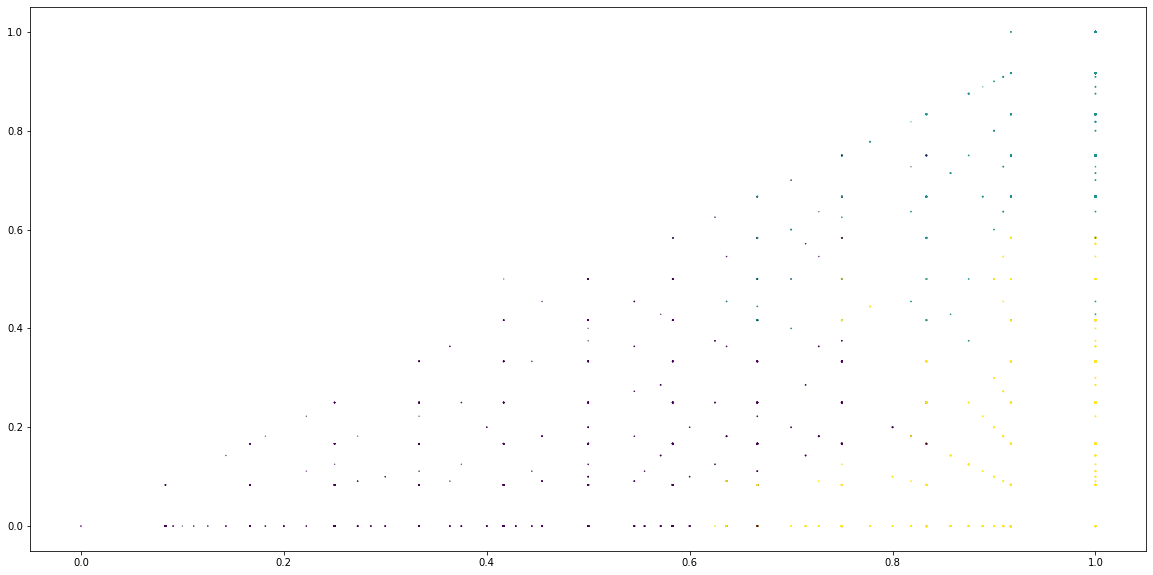

In [120]:
fig =plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(data['PURCHASES_FREQUENCY'] , data["ONEOFF_PURCHASES_FREQUENCY"],data['PURCHASES_INSTALLMENTS_FREQUENCY'], c=clust_df[0])

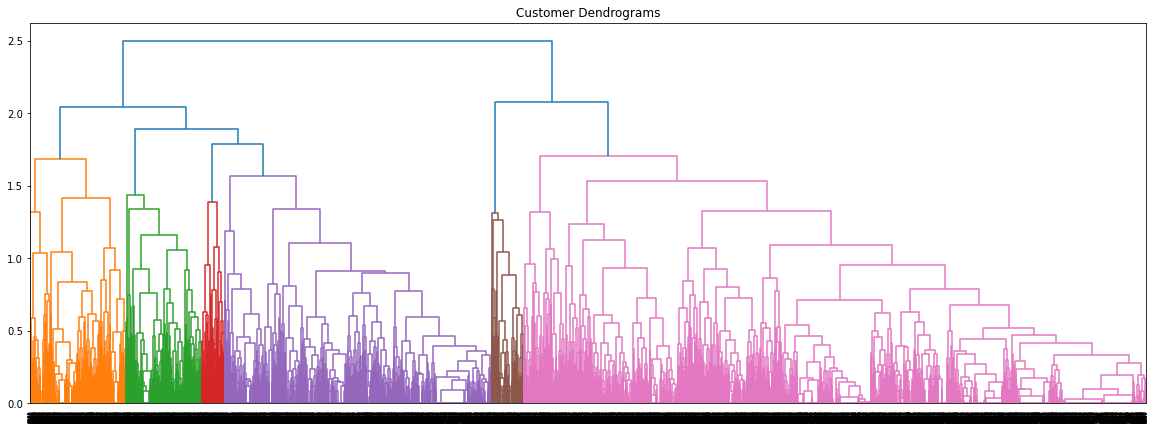

In [19]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,7))
plt.title("Customer Dendrograms")

dend=shc.dendrogram(shc.linkage(x, method="complete"))

In [106]:
sil_score = silhouette_score(x, agg_clusters.labels_)
print("Silhouette score:", sil_score)

Silhouette score: 0.5739211842781657


## K-Means Clustering

In [128]:
#Data spliting to test and train

X_train = x.loc[:7160]
X_test = x.loc[7160:]

In [141]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans

k_model = KMeans(n_clusters=3,random_state=0)


k_model.fit(X_train)

KMeans(n_clusters=3, random_state=0)

In [142]:
#Converting the Kmeans clusters into a Pandas Dataframe

labels = pd.DataFrame(model2.labels_)

labels.head()

,0
0,2
1,2
2,3
3,2
4,2


In [143]:
y_pred = k_model.predict(X_test)

In [144]:
#the various centroid for each clusters
k_model.cluster_centers_

array([[0.89648415, 0.81205967, 0.4746483 ],
       [0.14511551, 0.08210842, 0.06204305],
       [0.87490257, 0.12375066, 0.82447897]])

In [145]:
from sklearn.metrics import silhouette_score
print (f'Silhouette score(n=2): {silhouette_score(X_test,y_pred)}')

Silhouette score(n=2): 0.6454231506635831


In [139]:
# Finding the Best K value 

sum_of_squared_dist = []

for i in range(1,10):
  model = KMeans(n_clusters=i)
  model.fit(X_train)
  sum_of_squared_dist.append(model.inertia_)

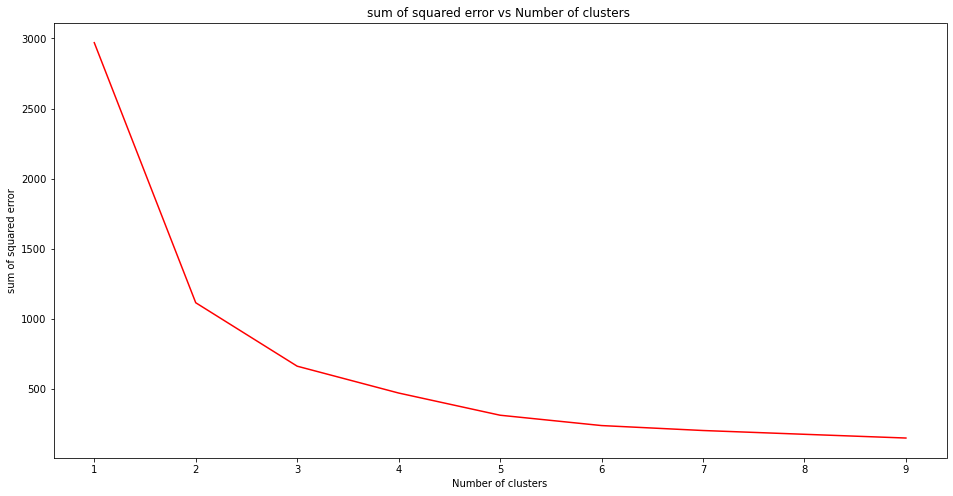

In [140]:
plt.figure(figsize=(16,8))

plt.plot(range(1,10), sum_of_squared_dist, color='r' )
plt.xlabel ('Number of clusters')
plt.ylabel ('sum of squared error')
plt.title('sum of squared error vs Number of clusters ')
plt.show()

At first, Sum of squared error decreases rapidly as the number of clusters increases, but after a certain number of clusters, the rate of decrease slows down. The number of clusters at which the rate of decrease slows down is when the value of k is 3. This point is referred to as the "elbow"

#### Comparing the Silhouette score of the hierarchical clustering and k-means clustering. K-Means clustering produce more distint clusters compared to hierarchical clustering